## Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and investigate the data

In [33]:
data = pd.read_csv("../Data/estimation_of_obesity.csv")
data.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [34]:
data.corr()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
Height,1.000000,0.461701,0.251567,-0.135810,0.034303,-0.181310,-0.040028,-0.193668,-0.051355,0.217372,0.292630,-0.077493,-0.071933,0.037007,0.134491
Weight,0.461701,1.000000,0.500309,-0.201567,-0.102000,-0.273515,0.216228,-0.317271,-0.292327,0.203345,-0.054236,-0.274363,-0.233389,0.338565,0.914836
family_history_with_overweight,0.251567,0.500309,1.000000,-0.190386,-0.069341,-0.213405,0.042027,-0.181687,-0.166710,0.147528,-0.056962,-0.072892,0.015819,0.279479,0.506664
SCC,-0.135810,-0.201567,-0.190386,1.000000,0.036370,0.181746,0.067625,0.009412,0.108133,0.000435,0.066457,0.119233,0.050665,-0.168124,-0.192871
MTRANS_Walking,0.034303,-0.102000,-0.069341,0.036370,1.000000,0.174522,0.010741,0.035450,0.078853,0.003397,0.102860,0.126371,0.060089,-0.080265,-0.138188
FAVC_z,-0.181310,-0.273515,-0.213405,0.181746,0.174522,1.000000,0.026302,0.031335,0.151905,-0.017531,0.104583,0.069917,0.130957,-0.096230,-0.247947
FCVC_minmax,-0.040028,0.216228,0.042027,0.067625,0.010741,0.026302,1.000000,-0.076890,0.050203,0.068599,0.016019,-0.229748,-0.079759,0.056260,0.229874
NCP_z,-0.193668,-0.317271,-0.181687,0.009412,0.035450,0.031335,-0.076890,1.000000,0.053931,-0.053719,0.004768,0.145645,0.135720,-0.130769,-0.285322
CAEC_minmax,-0.051355,-0.292327,-0.166710,0.108133,0.078853,0.151905,0.050203,0.053931,1.000000,-0.145490,0.028205,0.104910,0.150302,-0.115721,-0.330637
CH2O_minmax,0.217372,0.203345,0.147528,0.000435,0.003397,-0.017531,0.068599,-0.053719,-0.145490,1.000000,0.164609,-0.011077,-0.034165,-0.000661,0.134237


## Split the data

In [35]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1668, 14), (418, 14))

## Normalize the data (Scale)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
standard_scaler = StandardScaler()

In [40]:
X_train_standarded = standard_scaler.fit_transform(X_train)
X_test_transformed = standard_scaler.transform(X_test)

## Import and train the models

### Logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_standarded, y_train)

LogisticRegression()

In [43]:
y_preds_log = logistic_regression_model.predict(X_test_transformed)

### Support Vector Classifier (SVC)

In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC()
svc.fit(X_train_standarded, y_train)

SVC()

In [46]:
y_preds_svc = svc.predict(X_test_transformed)

### Naive Bayes

#### Gaussian Naive Bayes (GNB)

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()
gnb.fit(X_train_standarded, y_train)

GaussianNB()

In [49]:
y_preds_gnb = gnb.predict(X_test_transformed)

#### Bernoulli Naive Bayes (BNB)

In [50]:
from sklearn.naive_bayes import BernoulliNB

In [51]:
bnb = BernoulliNB()
bnb.fit(X_train_standarded, y_train)

BernoulliNB()

In [52]:
y_preds_bnb = bnb.predict(X_test_transformed)

### Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_standarded, y_train)

DecisionTreeClassifier()

In [55]:
y_preds_dtc = decision_tree_classifier.predict(X_test_transformed)

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_standarded, y_train)

RandomForestClassifier()

In [58]:
y_preds_rf = random_forest_classifier.predict(X_test_transformed)

## Test the models and compare them

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
print(f"Logistic regression model's accuracy : {accuracy_score(y_test, y_preds_log):.2f}")
print(f"SVC model's accuracy : {accuracy_score(y_test, y_preds_svc):.2f}")
print(f"GNB model's accuracy : {accuracy_score(y_test, y_preds_gnb):.2f}")
print(f"BNB model's accuracy : {accuracy_score(y_test, y_preds_bnb):.2f}")
print(f"Decision Tree model's accuracy : {accuracy_score(y_test, y_preds_dtc):.2f}")
print(f"Random Forest model's accuracy : {accuracy_score(y_test, y_preds_rf):.2f}")

Logistic regression model's accuracy : 0.89
SVC model's accuracy : 0.89
GNB model's accuracy : 0.62
BNB model's accuracy : 0.53
Decision Tree model's accuracy : 0.96
Random Forest model's accuracy : 0.96


In [61]:
cm_rf = confusion_matrix(y_test, y_preds_rf)
cm_rf

array([[51,  3,  0,  0,  0,  0,  0],
       [ 1, 63,  2,  0,  0,  0,  0],
       [ 0,  2, 53,  1,  0,  0,  0],
       [ 0,  1,  2, 45,  0,  0,  0],
       [ 0,  1,  1,  1, 68,  0,  0],
       [ 0,  0,  0,  0,  0, 67,  0],
       [ 0,  0,  0,  0,  0,  0, 56]])

In [62]:
import seaborn as sns

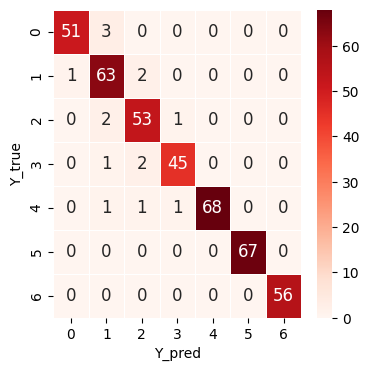

In [64]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_rf, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()